## Pandas Overview

- [Pandas](http://pandas.pydata.org/) is a package of fast, efficient data analysis tools for Python
- Just as [NumPy](http://www.numpy.org/) provides the basic array data type plus core array operations, pandas 

1. defines fundamental structures for working with data and  
2. endows them with methods that facilitate operations such as  
    - reading in data  
    - adjusting indices  
    - working with dates and time series  
    - sorting, grouping, re-ordering and general data munging
    - dealing with missing values, etc., etc.  

- Throughout the lecture we will assume that the following imports have taken place

In [1]:
import pandas as pd
import numpy as np

## Series

- Two important data types defined by pandas are  `Series` and `DataFrame`
- You can think of a `Series` as a “column” of data, such as a collection of observations on a single variable
- A `DataFrame` is an object for storing related columns of data

In [2]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    0.761160
1    0.025336
2   -0.201717
3   -0.804277
Name: daily returns, dtype: float64

- Here you can imagine the indices `0, 1, 2, 3` as indexing four listed companies, and the values being daily returns on their shares
- Pandas `Series` are built on top of NumPy arrays, and support many similar operations

In [3]:
s * 100

0    76.116000
1     2.533632
2   -20.171729
3   -80.427652
Name: daily returns, dtype: float64

In [4]:
np.abs(s)

0    0.761160
1    0.025336
2    0.201717
3    0.804277
Name: daily returns, dtype: float64

- But `Series` provide more than NumPy arrays
- Not only do they have some additional (statistically oriented) methods

In [5]:
s.describe()

count    4.000000
mean    -0.054874
std      0.646919
min     -0.804277
25%     -0.352357
50%     -0.088190
75%      0.209292
max      0.761160
Name: daily returns, dtype: float64

- But their indices are more flexible

In [6]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    0.761160
AAPL    0.025336
MSFT   -0.201717
GOOG   -0.804277
Name: daily returns, dtype: float64

- Viewed in this way, `Series` are like fast, efficient Python dictionaries (with the restriction that the items in the dictionary all have the same type—in this case, floats)
- In fact, you can use much of the same syntax as Python dictionaries

In [7]:
s['AMZN']

0.7611599958544286

In [8]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL    0.025336
MSFT   -0.201717
GOOG   -0.804277
Name: daily returns, dtype: float64

In [9]:
'AAPL' in s

True

## DataFrames

- While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable
- In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet
- Thus, it is a powerful tool for representing and analyzing data that are naturally organized  into rows and columns, often with  descriptive indexes for individual rows and individual columns

- Supposing you have this data saved as test_pwt.csv in the data directory, it can be read in as follows:

In [10]:
df = pd.read_csv('data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [11]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


- We can select particular rows using standard Python array slicing notation

In [12]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


- To select columns, we can pass a list containing the names of the desired columns represented as strings

In [13]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


- To select both rows and columns using integers, the `iloc` attribute should be used with the format `.iloc[rows,columns]`

In [14]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


- To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way

In [15]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


- Let’s imagine that we’re only interested in population and total GDP (`tcgdp`)
- One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above

In [16]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


- Here the index `0, 1,..., 7` is redundant, because we can use the country names as an index
- To do this, we set the index to be the `country` variable in the dataframe

In [17]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


- Let’s give the columns slightly better names

In [18]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


- Population is in thousands, let’s revert to single units

In [19]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


- Next we’re going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions

In [20]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


- One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib

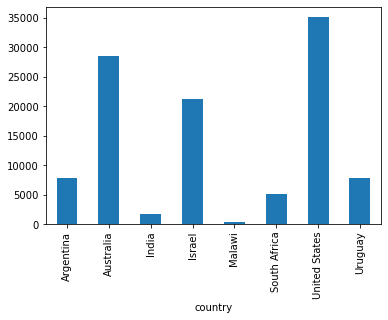

In [21]:
import matplotlib.pyplot as plt

df['GDP percap'].plot(kind='bar')
plt.show()

- At the moment the data frame is ordered alphabetically on the countries—let’s change it to GDP per capita

In [22]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


- Plotting as before now yields

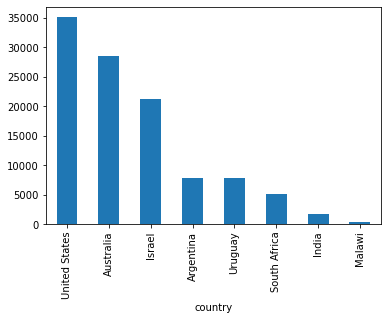

In [23]:
df['GDP percap'].plot(kind='bar')
plt.show()